# Normal Distribution and Transformation

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('marketing_cva_f.csv')
df.head()

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


In [3]:
df.shape

(6817, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       6817 non-null   object 
 1   State                          6817 non-null   object 
 2   CLV                            6817 non-null   float64
 3   Coverage                       6817 non-null   object 
 4   Income                         6817 non-null   int64  
 5   loc_type                       6817 non-null   object 
 6   monthly_premium                6817 non-null   int64  
 7   months_last_claim              6817 non-null   int64  
 8   Months_Since_Policy_Inception  6817 non-null   int64  
 9   Total_Claim_Amount             6817 non-null   float64
 10  Vehicle_Class                  6817 non-null   object 
 11  avg_vehicle_age                6817 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage:

In [5]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Coverage                         0
Income                           0
loc_type                         0
monthly_premium                  0
months_last_claim                0
Months_Since_Policy_Inception    0
Total_Claim_Amount               0
Vehicle_Class                    0
avg_vehicle_age                  0
dtype: int64

In [6]:
df.describe()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,15.046941,47.832624,377.840789,50.126257
std,6949.067972,24305.956566,34.615160,10.064762,27.895350,252.648952,9.919767
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.099007,11.875974
25%,4090.750678,28432.000000,68.000000,6.000000,24.000000,210.100003,43.449925
50%,5810.630529,48081.000000,83.000000,14.000000,48.000000,340.800000,50.100924
75%,9075.768214,70187.000000,109.000000,23.000000,71.000000,498.612632,56.877234
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,2893.239678,83.387485


<AxesSubplot:xlabel='avg_vehicle_age', ylabel='Density'>

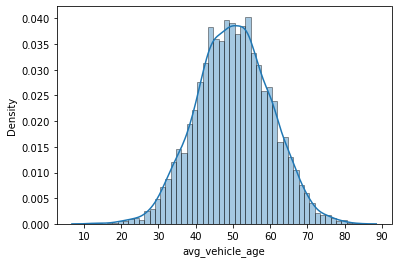

In [12]:
sns.distplot(df['avg_vehicle_age'], hist=True, hist_kws=dict(ec='k'))

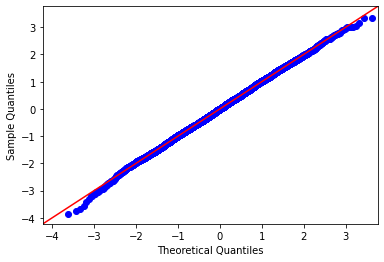

In [22]:
plot = sm.qqplot(df['avg_vehicle_age'], fit=True, line='45')

<AxesSubplot:xlabel='avg_vehicle_age'>

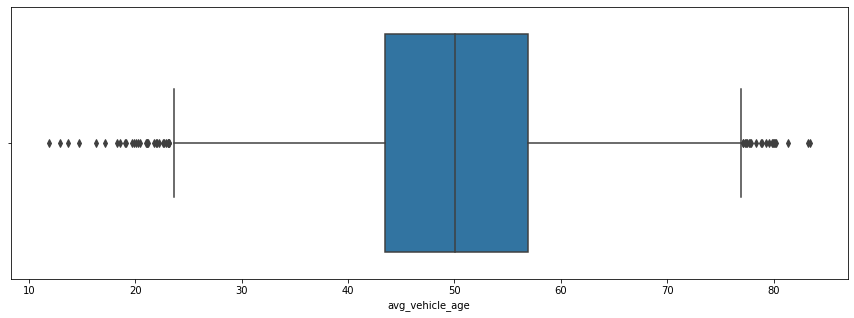

In [23]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="avg_vehicle_age", data=df)

**Declaring the Hypothesis**
    
    NULL HYPOTHESIS : Data come from a normal distribution
    
    ALTERNATE HYPOTHESIS : Data dosen't come from a normal distribution

In [24]:
chi2, p = stats.normaltest(df['avg_vehicle_age'])
print('Chi2 = %.2f, p-value = %.3f'%(chi2, p))

Chi2 = 1.04, p-value = 0.593


     So in this case the p-value is > 0.5 .... so the null Hypothesis is true

## Boxcox Transformation

In [25]:
from scipy import stats
_, l = stats.boxcox(df['avg_vehicle_age'])

In [27]:
print('lambda  : ',l) # IF YOUR LAMBDA VALUE IS 1 THEN THE DATA IS NORMALLY DISTRIBUTED

lambda  :  1.0401663194162196


# Important table for transformation

    Lambda          Transformation
    
    -2              1/square(input)
    -1              1/input
    -0.5            1/sqrt(input)
    0               log(input)
    0.5             sqrt(input)
    1               As it is
    2               Square(input)
    

# Income feature

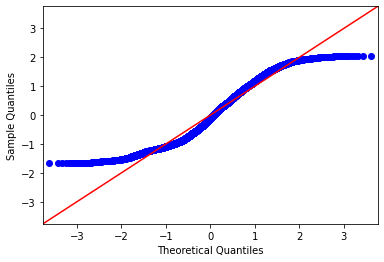

In [28]:
plot = sm.qqplot(df['Income'], line='45', fit=True)

<AxesSubplot:xlabel='Income'>

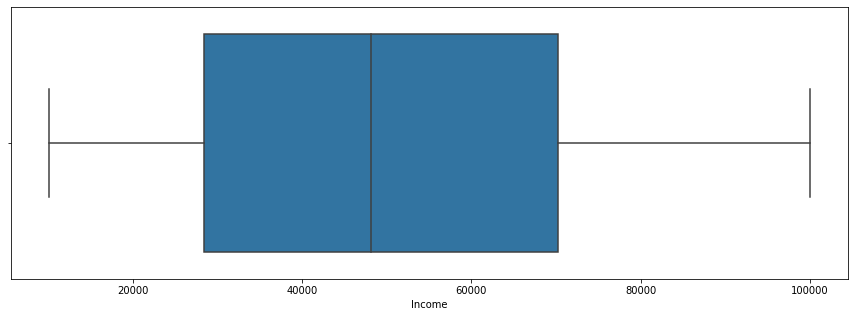

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Income", data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

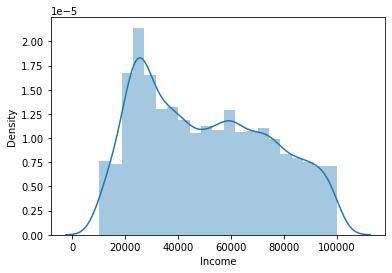

In [34]:
sns.distplot(df['Income'], hist=True)

In [35]:
stats.anderson(df['Income'], dist='norm')

AndersonResult(statistic=94.67577589421035, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**Anderson test shows that the critical value of 5 which is 0.787 is smaller than the statistic value which is 94.67 so we will reject the null hypothesis**

## Boxcox transformation

In [36]:
_, l = stats.boxcox(df['Income'])
print(' l ', l)

 l  0.44437538279540056


d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

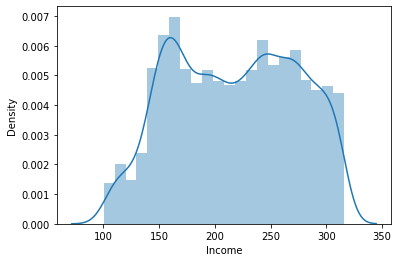

In [42]:
sns.distplot(np.sqrt(df['Income']), hist=True)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

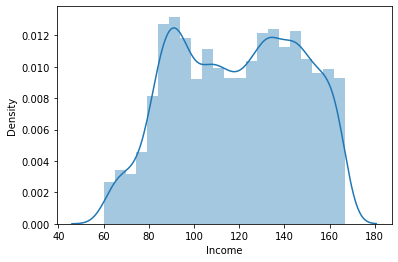

In [43]:
sns.distplot(df['Income'].apply(lambda x : np.power(x, l)), hist=True)

In [44]:
stats.boxcox(df['Income'].apply(lambda x : np.power(x, l)))

(array([128.09819109, 120.14015208, 114.53556654, ..., 142.98627724,
         83.36466029,  83.94694497]),
 1.0000001881629772)

**Now the boxcox lambda value is giving 1 ...so it is now normally distributed**

# CLV column

<AxesSubplot:xlabel='CLV'>

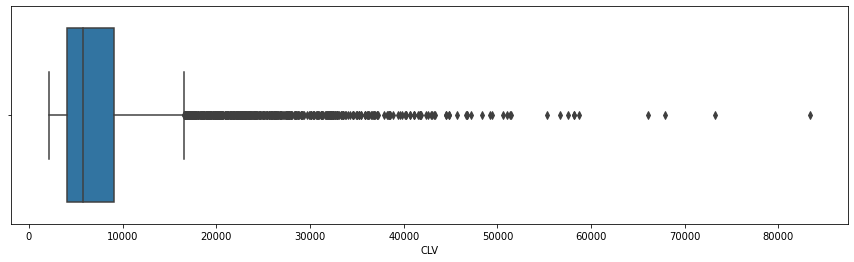

In [51]:
plt.figure(figsize=(15,4))
sns.boxplot(x='CLV', data=df)

d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLV', ylabel='Density'>

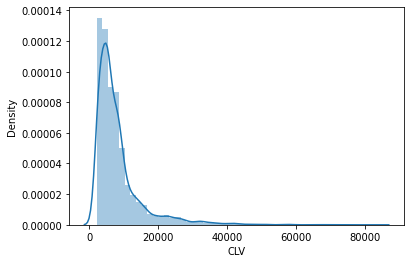

In [50]:
sns.distplot(df['CLV'], bins=50)

In [52]:
_, l = stats.boxcox(df['CLV'])
print(l)

-0.3628046005612987


d:\anacondafiles\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLV', ylabel='Density'>

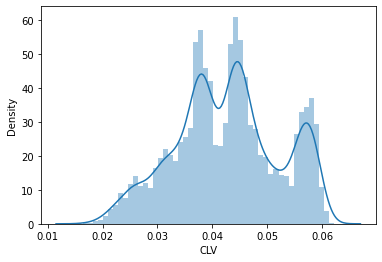

In [53]:
sns.distplot(df['CLV'].apply(lambda x:1/np.power(x, np.abs(l))), bins=50)

In [54]:
_, l = stats.boxcox(df['CLV'].apply(lambda x : 1/np.power(x, np.abs(l))))
print(l)

0.9999998972585702
